## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import path
pd.set_option('display.max_columns', 500)
%matplotlib inline

## Convert empty trays to np.NaN

In [2]:
train = pd.read_csv('train_with_labels_v3.csv')
for row in range(len(train.OutputID)):
    for r in range(1,12):
        x = 0
        y = 0
        for i in range(1,5):
            x += train.at[row,f'row_{r}_X_{i}']
            y += train.at[row,f'row_{r}_Y_{i}']
        if x + y == 0:
            for i in range(1,5):
                train.loc[[row],[f'row_{r}_X_{i}']] = np.NaN
                train.loc[[row],[f'row_{r}_Y_{i}']] = np.NaN

## Get dimensions of the original images

In [3]:
fpath = path.Path('./data/train/')
height = []
width = []
for file in train.OutputID:
    img = cv2.imread(fpath+file, cv2.IMREAD_COLOR)
    img_shp = img.shape
    height.append(img_shp[0])
    width.append(img_shp[1])    

In [4]:
train['img_height'] = height
train['img_width'] = width

## Add a border to the images

In [5]:
def add_border(src_path, dest_path, border, replace=False):
    """
    Adds a border to all images in src_path and puts them in dest_path

    Parameters:
        -src_path: a path.Path variable for the source images
        -dest_path: a path.Path variable for target of images with borders
        -border: the width in pixels of the border to add to each image
        -overwrite: pre

    Returns:
        -it: a numpy array that consists of the coordinates and intensities of each pixel in the radii (shape: [numPixels, 3], row = [x,y,intensity])     
    """
    os.makedirs(dest_path, exist_ok=True)
    for file in os.listdir(src_path):
        if not(os.path.isfile(dest_path+file)) or replace:
            src = cv2.imread(src_path+file, cv2.IMREAD_COLOR)
            dst = cv2.copyMakeBorder(src, 
                                     top=border, bottom=border, left=border, right=border, 
                                     borderType=cv2.BORDER_CONSTANT, 
                                     #None, 
                                     value=[255,0,255])  #color is hot pink
            cv2.imwrite(dest_path+file,dst)
            
    return 

            

overwrite = False  #specify to overwrite existing files
border=100

#add border to training images
training_path = path.Path('./data/train/')
training_path_border = path.Path('./data/train_with_border/')
add_border(training_path, training_path_border, border=border, replace=overwrite)

#add border to testing images
testing_path = path.Path('./data/test/')
testing_path_border = path.Path('./data/test_with_border/')
add_border(testing_path, testing_path_border, border=border, replace=overwrite)

## Update coordinates to account for border

In [6]:
def update_coords_with_border(df , border):
    """
    Function to adjust box coordinates after a border has been added to an image
    
    Inputs:
    
    """
    x_columns = [x for x in list(df.columns.values) if '_X_' in x]
    y_columns = [x for x in list(df.columns.values) if '_Y_' in x]
    
    df[x_columns] += border  #x = row[f'row_{r}_X_{i}']
    for column in y_columns:
        df[column] = border + df.img_height - df[column]
    #df[y_columns] = border + df.img_height - df[y_columns] #y = img.shape[0] - row[f'row_{r}_Y_{i}']
    
    return df

In [7]:
train_border_coords = update_coords_with_border(train, border)

train_border_coords

,OutputID,row_1_X_1,row_1_Y_1,row_1_X_2,row_1_Y_2,row_1_X_3,row_1_Y_3,row_1_X_4,row_1_Y_4,row_2_X_1,row_2_Y_1,row_2_X_2,row_2_Y_2,row_2_X_3,row_2_Y_3,row_2_X_4,row_2_Y_4,row_3_X_1,row_3_Y_1,row_3_X_2,row_3_Y_2,row_3_X_3,row_3_Y_3,row_3_X_4,row_3_Y_4,row_4_X_1,row_4_Y_1,row_4_X_2,row_4_Y_2,row_4_X_3,row_4_Y_3,row_4_X_4,row_4_Y_4,row_5_X_1,row_5_Y_1,row_5_X_2,row_5_Y_2,row_5_X_3,row_5_Y_3,row_5_X_4,row_5_Y_4,row_6_X_1,row_6_Y_1,row_6_X_2,row_6_Y_2,row_6_X_3,row_6_Y_3,row_6_X_4,row_6_Y_4,row_7_X_1,row_7_Y_1,row_7_X_2,row_7_Y_2,row_7_X_3,row_7_Y_3,row_7_X_4,row_7_Y_4,row_8_X_1,row_8_Y_1,row_8_X_2,row_8_Y_2,row_8_X_3,row_8_Y_3,row_8_X_4,row_8_Y_4,row_9_X_1,row_9_Y_1,row_9_X_2,row_9_Y_2,row_9_X_3,row_9_Y_3,row_9_X_4,row_9_Y_4,row_10_X_1,row_10_Y_1,row_10_X_2,row_10_Y_2,row_10_X_3,row_10_Y_3,row_10_X_4,row_10_Y_4,row_11_X_1,row_11_Y_1,row_11_X_2,row_11_Y_2,row_11_X_3,row_11_Y_3,row_11_X_4,row_11_Y_4,Type_0,Type_1,Type_2,Type_3,Type_4,Type_5,ImageLocation,MaskLocation,img_height,img_width
0,Image376_1TPP_4R_PL2.jpg,200,249,3627,217,3630,483,200,509,200,520,3630,489,3630,759,202,786,203,795,3630,764,3628,1033,205,1062,205.0,1072.0,3630.0,1040.0,3633.0,1303.0,208.0,1338.0,208.0,1348.0,3632.0,1307.0,3631.0,1577.0,214.0,1609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,https://firebasestorage.googleapis.com/v0/b/la...,"{""Type0_straight_tray"":""https://imagemasks.s3....",2736,3648
1,Image208_1TPP_3R_MT.jpg,198,421,1629,406,1632,562,200,579,200,583,1636,564,1637,687,205,719,205,724,1638,695,1640,845,207,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,https://firebasestorage.googleapis.com/v0/b/la...,"{""Type0_straight_tray"":""https://imagemasks.s3....",1200,1600
2,Image212_1TPP_3R_MT.jpg,200,432,1631,414,1635,565,205,585,205,589,1637,568,1639,694,208,725,208,727,1641,700,1644,844,208,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,https://firebasestorage.googleapis.com/v0/b/la...,"{""Type0_straight_tray"":""https://imagemasks.s3....",1200,1600
3,Image202_1TPP_3R_MT.jpg,201,426,1631,409,1632,551,206,575,203,580,1634,560,1637,686,210,715,208,722,1639,689,1643,846,211,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,https://firebasestorage.googleapis.com/v0/b/la...,"{""Type0_straight_tray"":""https://imagemasks.s3....",1200,1600
4,Image242_2TPP_4R_MT.JPG,203,290,2592,286,2602,458,208,462,209,469,2605,464,2607,644,203,660,205,664,2612,647,2614,825,195,845,196.0,848.0,2616.0,830.0,2618.0,1013.0,198.0,1023.0,200.0,1097.0,2619.0,1084.0,2622.0,1258.0,203.0,1282.0,204.0,1284.0,2620.0,1262.0,2625.0,1447.0,207.0,1462.0,210.0,1465.0,2626.0,1453.0,2619.0,1635.0,210.0,1643.0,209.0,1655.0,2616.0,1639.0,2620.0,1825.0,221.0,1825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,https://firebasestorage.googleapis.com/v0/b/la...,"{""Type0_straight_tray"":""https://imagemasks.s3....",1944,2592
5,Image404_1TPP_5R_MT_FE.JPG,203,373,1015,375,1016,433,203,434,203,436,1017,435,1017,491,202,491,201,494,1017,492,1018,548,201,550,202.0,552.0,1017.0,549.0,1017.0,607.0,202.0,609.0,201.0,610.0,1018.0,608.0,1018.0,669.0,203.0,670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Plot Boxes

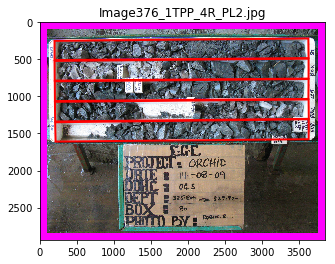

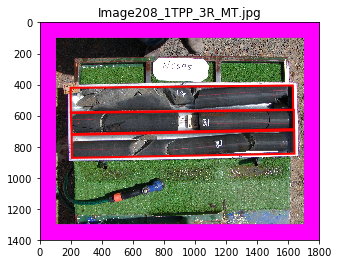

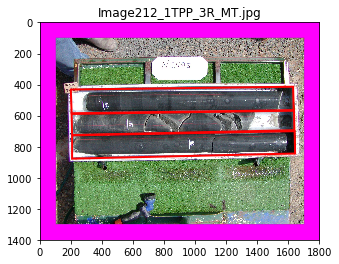

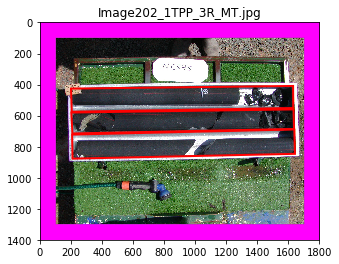

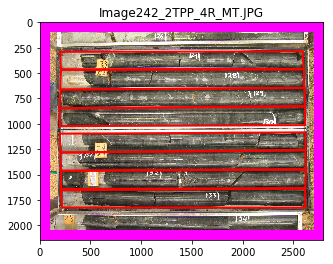

In [9]:
def plot_boxes(path, row):
    img = plt.imread(path+row.OutputID)
    plt.figure()
    fig = plt.imshow(img)
    plt.title(row.OutputID)
    ax = fig.axes
    i=1
    for r in range(1,12):
        patch = []
        for i in range(1,5):
            x = row[f'row_{r}_X_{i}']
            y = row[f'row_{r}_Y_{i}']
            patch.append([x,y])
        ax.add_patch(patches.Polygon(patch, closed=True, fill=False, linewidth=2,color='red'))

for i in range(10):
    plot_boxes(training_path_border, train_border_coords.iloc[i])